## 1) Import important libraries ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

## 2) Data Exploration ##

In [3]:
heart_df = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

_This dataset does not contain missing values_

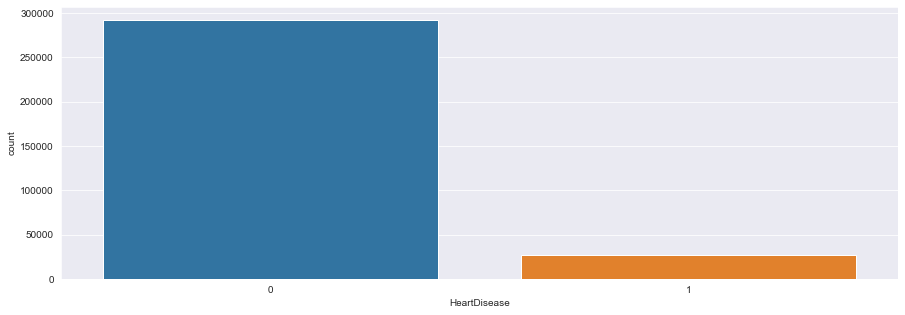

In [22]:
sns.countplot(x=heart_df['HeartDisease'])
plt.show()

_There are much more cases of 'no' heart disease than there are 'yes' cases. This could possibly produce skewed data meaning the model is less likely to predict correctly 'yes' cases._

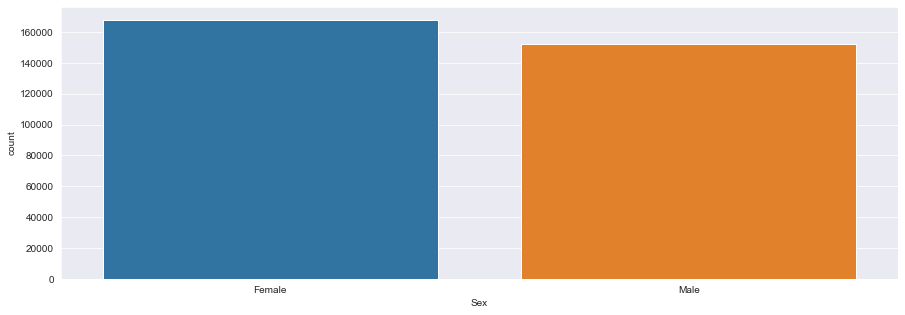

In [8]:
sns.countplot(x=heart_df['Sex'])
plt.show()

_This dataset has more female than male tested though the difference isn't too large._

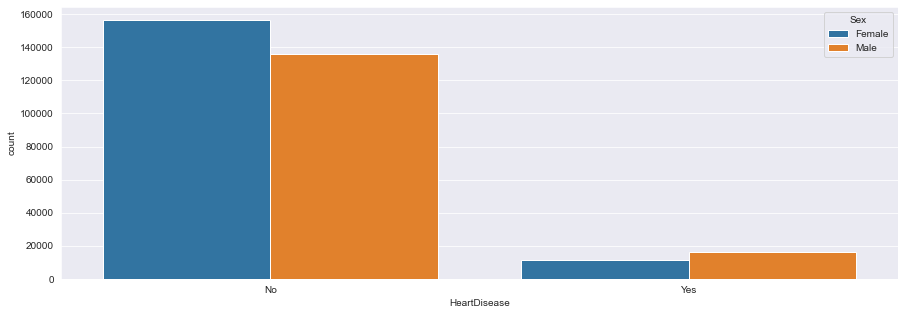

In [9]:
sns.countplot(x=heart_df['HeartDisease'], hue='Sex', data=heart_df)
plt.show()

In [10]:
total_yes = len(heart_df[heart_df['HeartDisease']=='Yes'])
male_yes = len(heart_df[(heart_df['HeartDisease']=='Yes') & (heart_df['Sex']=='Male')])
female_yes = len(heart_df[(heart_df['HeartDisease']=='Yes') & (heart_df['Sex']=='Female')])
print('Total patients with heart disease:', total_yes)
print('Total male patients with heart disease:', male_yes)
print('Total female patients with heart disease:', female_yes)

Total patients with heart disease: 27373
Total male patients with heart disease: 16139
Total female patients with heart disease: 11234


_More patients with heart disease were male. 59% of patients with heart disease were male compared to 41% female._

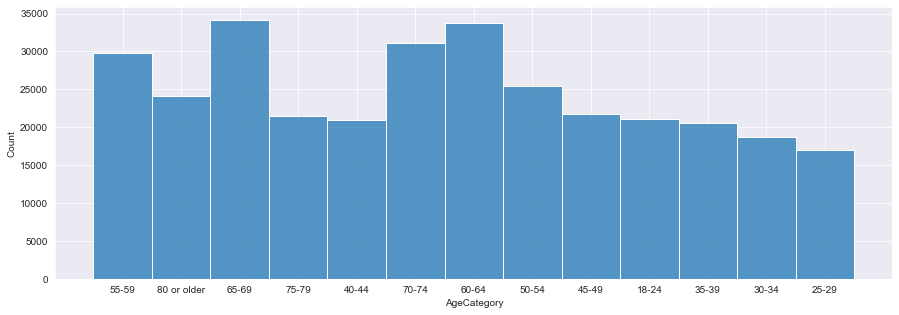

In [11]:
sns.histplot(x=heart_df['AgeCategory'])
plt.show()

_There is generally equal distributions of age for this dataset._

## 3) Data Pre-Processing/Cleaning ##

____We want to change AgeCategory to a continuous value as it is better for the model (this is done using the mean of all categories)____

In [12]:
AgeCategory_dict = {'AgeCategory': {'55-59':57,'80 or older':80,'65-69':67,'75-79':77,'40-44':42,'70-74':72,'60-64':62,'50-54':52,'45-49':47,'18-24':21,'35-39':37,'30-34':32,'25-29':27}}
heart_df = heart_df.replace(AgeCategory_dict)
heart_df['AgeCategory']

0         57
1         80
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    80
Name: AgeCategory, Length: 319795, dtype: int64

__Visualizing columns and storing it into other variables for use if necessary__

In [13]:
numerical_col = ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']
categorical_col = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
heart_df[numerical_col]

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,16.60,3.0,30.0,57,5.0
1,20.34,0.0,0.0,80,7.0
2,26.58,20.0,30.0,67,8.0
3,24.21,0.0,0.0,77,6.0
4,23.71,28.0,0.0,42,8.0
...,...,...,...,...,...
319790,27.41,7.0,0.0,62,6.0
319791,29.84,0.0,0.0,37,5.0
319792,24.24,0.0,0.0,47,6.0
319793,32.81,0.0,0.0,27,12.0


In [14]:
heart_df[categorical_col]

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,Hispanic,No,No,Good,No,No,No


__We want to change categorical values to numbers, those with 2 unique values can be binary (0-1)__

In [15]:
heart_df[categorical_col].nunique()

HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

In [16]:
le = preprocessing.LabelEncoder()

# for all categorical columns that have only 2 unique values change them to binary (0-1)
for col in heart_df[categorical_col]:
    if heart_df[col].nunique() == 2:
        heart_df[col] = le.fit_transform(heart_df[col])
        
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,White,No,1,Very good,8.0,0,0,0


__No is 0, Yes is 1__

__Female is 0, male is 1__

__We use simple pandas get dummies function for other categorical values that have more than two unique values and can't be binary__

In [17]:
heart_df = pd.get_dummies(heart_df, columns=['Race', 'Diabetic', 'GenHealth'])
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,57,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,67,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,42,...,1,1,0,0,0,0,0,0,0,1


## 4) Undersampling ##

In [104]:
from sklearn.model_selection import train_test_split

X = heart_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']]
y = heart_df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

__Classes are very unbalanced which is not good for linear/logistic regression models and must be changed by undersampling__

In [105]:
print("The Number of Samples in the dataset: ", len(heart_df))
print('Class 0:', round(heart_df['HeartDisease'].value_counts()[0]
                      /len(heart_df) * 100, 2), '% of the dataset')
   
print('Class 1:', round(heart_df['HeartDisease'].value_counts()[1]
                      /len(heart_df) * 100, 2), '% of the dataset')

The Number of Samples in the dataset:  319795
Class 0: 91.44 % of the dataset
Class 1: 8.56 % of the dataset


In [106]:
from collections import Counter

print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for class 0 and {sorted(Counter(y_train).items())[1][1]} records for class 1.")

The training dataset has 204773 records for class 0 and 19083 records for class 1.


__Use undersampling to fix unbalanced classes__

In [107]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_rus).items()))

[(0, 19083), (1, 19083)]


## 5) Model ##

In [108]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train_rus,y_train_rus)

LogisticRegression(max_iter=1000)

In [109]:
predictions = logmodel.predict(X_test)

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     87649
           1       0.23      0.78      0.35      8290

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.60     95939
weighted avg       0.91      0.75      0.80     95939

[[65591 22058]
 [ 1857  6433]]


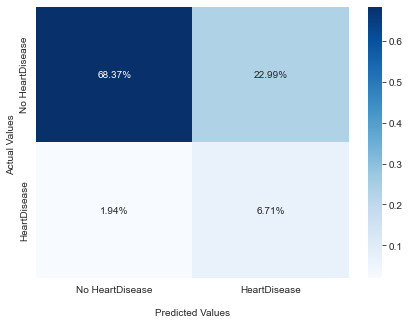

In [111]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

_In the case of this dataset, we want to reduce the FN rate because the costs of a false negative is very high. This model could be effective because FN is only 1.94% and we have a high recall score. For this test, a higher recall is better than a high precision. It is ok if a person is misdiagnosed with heart disease when they don't have it, but it is not ok to predict a person as no heart disease when they have it._ 